In [14]:
from datasets import load_dataset

ds = load_dataset("JacobLinCool/VoiceBank-DEMAND-16k", use_auth_token=True, cache_dir="/storage/hdd0/data/mayank_dataset")

/home/mayank.mds2023/miniconda3/envs/aml/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using custom data configuration JacobLinCool--VoiceBank-DEMAND-16k-2c58d2d1c1a56ab1
Reusing dataset parquet (/storage/hdd0/data/mayank_dataset/JacobLinCool___parquet/JacobLinCool--VoiceBank-DEMAND-16k-2c58d2d1c1a56ab1/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 2/2 [00:00<00:00, 367.71it/s]


In [15]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda-11.8/lib64'

import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())

1.4.0
10.1
True


In [3]:
ds.keys()

dict_keys(['test', 'train'])

In [4]:
print(ds)

DatasetDict({
    test: Dataset({
        features: ['id', 'clean', 'noisy'],
        num_rows: 824
    })
    train: Dataset({
        features: ['id', 'clean', 'noisy'],
        num_rows: 11572
    })
})


In [5]:
ds['test'][0]

{'id': 'p232_001',
 'clean': {'path': 'p232_001.wav',
  'array': array([ 0.00213623,  0.00323486,  0.00244141, ..., -0.00576782,
         -0.00543213, -0.00354004]),
  'sampling_rate': 16000},
 'noisy': {'path': 'p232_001.wav',
  'array': array([ 0.01589966,  0.02572632,  0.02059937, ..., -0.00421143,
         -0.00469971, -0.00354004]),
  'sampling_rate': 16000}}

In [8]:
for example in ds['train']:
    print(example)
    break

{'id': 'p226_001', 'clean': {'path': 'p226_001.wav', 'array': array([-0.00286865, -0.00497437, -0.00469971, ..., -0.00201416,
       -0.00152588, -0.00021362]), 'sampling_rate': 16000}, 'noisy': {'path': 'p226_001.wav', 'array': array([-0.00283813, -0.00488281, -0.00473022, ...,  0.006073  ,
        0.00564575,  0.00540161]), 'sampling_rate': 16000}}


In [9]:
example.keys()

dict_keys(['id', 'clean', 'noisy'])

In [10]:
clean = example['clean']
clean.keys()

dict_keys(['path', 'array', 'sampling_rate'])

In [11]:
clean['array'].shape

(36480,)

In [12]:
example['noisy']['array'].shape

(36480,)

In [14]:
type(ds['train'])

datasets.arrow_dataset.Dataset

In [22]:
ds1 = ds['train'].train_test_split(test_size=0.1, seed=42)

In [23]:
ds1.keys()

dict_keys(['train', 'test'])

In [24]:
dataset_dict = {"train": ds1['train'], "val": ds1['test'], "test": ds['test']}

In [25]:
ds1['test'].shape

(1158, 3)

In [26]:
ds['test'].shape

(824, 3)

In [4]:
temp = ds['train'].train_test_split(test_size=0.1, seed=42)
dataset = {
    "train": temp['train'],
    "val": temp['test'],
    "test": ds['test']
}

Loading cached split indices for dataset at /storage/hdd0/data/mayank_dataset/JacobLinCool___parquet/JacobLinCool--VoiceBank-DEMAND-16k-2c58d2d1c1a56ab1/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-4ea28409c9bd1193.arrow and /storage/hdd0/data/mayank_dataset/JacobLinCool___parquet/JacobLinCool--VoiceBank-DEMAND-16k-2c58d2d1c1a56ab1/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-cbb577a008396ea1.arrow


In [5]:
dataset['test']

Dataset({
    features: ['id', 'clean', 'noisy'],
    num_rows: 824
})

In [6]:
for example in dataset['test']:
    print(example)
    break

{'id': 'p232_001', 'clean': {'path': 'p232_001.wav', 'array': array([ 0.00213623,  0.00323486,  0.00244141, ..., -0.00576782,
       -0.00543213, -0.00354004]), 'sampling_rate': 16000}, 'noisy': {'path': 'p232_001.wav', 'array': array([ 0.01589966,  0.02572632,  0.02059937, ..., -0.00421143,
       -0.00469971, -0.00354004]), 'sampling_rate': 16000}}


In [8]:
example['noisy'].keys()

dict_keys(['path', 'array', 'sampling_rate'])

In [10]:
example['noisy']['path']

'p232_001.wav'

In [ ]:
# read pkl file
import pickle


with open('./checkpoints/waveunet/results.pkl', 'rb') as f:
    test_data = pickle.load(f)
len(test_data)

824

In [2]:
test_data[0]

{'clean': {'SDR': array([23.12008813]),
  'ISR': array([30.36611248]),
  'SIR': array([inf]),
  'SAR': array([23.96229591])}}

In [16]:
from tensorboard.backend.event_processing import event_accumulator

# Load the event file
ea = event_accumulator.EventAccumulator("./logs/waveunet/events.out.tfevents.1744029334.gpuserver.1312197.0")
ea.Reload()

# List all tags
print("Tags:", ea.Tags())

Tags: {'images': [], 'audio': ['input', 'clean_pred', 'clean_target'], 'histograms': [], 'scalars': ['lr', 'train_loss', 'val_loss', 'test_loss', 'test_SDR_clean', 'test_SIR_clean', 'test_SDR'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [ ]:
pred = ea.Audio("clean_pred")
pred

In [18]:
for input_, clean_pred, clean_target in zip(ea.Audio('input'), ea.Audio('clean_pred'), ea.Audio('clean_target')):
    with open(f'./audio_outputs/input_{input_.step}.wav', 'wb') as f:
        f.write(input_.encoded_audio_string)
    with open(f'./audio_outputs/pred_{clean_pred.step}.wav', 'wb') as f:
        f.write(clean_pred.encoded_audio_string)
    with open(f'./audio_outputs/target_{clean_target.step}.wav', 'wb') as f:
        f.write(clean_target.encoded_audio_string)

In [6]:
ea.Scalars('train_loss')

[ScalarEvent(wall_time=1744029370.1239257, step=6, value=0.07837138324975967),
 ScalarEvent(wall_time=1744029370.9315038, step=17, value=0.0315263494849205),
 ScalarEvent(wall_time=1744029371.4529479, step=24, value=0.01803678646683693),
 ScalarEvent(wall_time=1744029373.907523, step=57, value=0.0220801942050457),
 ScalarEvent(wall_time=1744029374.649964, step=67, value=0.012236032634973526),
 ScalarEvent(wall_time=1744029375.1005812, step=73, value=0.0205983929336071),
 ScalarEvent(wall_time=1744029375.7797685, step=82, value=0.013320458121597767),
 ScalarEvent(wall_time=1744029377.7970436, step=108, value=0.016259538009762764),
 ScalarEvent(wall_time=1744029380.4137917, step=143, value=0.014257452450692654),
 ScalarEvent(wall_time=1744029380.637176, step=146, value=0.024792926385998726),
 ScalarEvent(wall_time=1744029381.083687, step=152, value=0.024088921025395393),
 ScalarEvent(wall_time=1744029382.583785, step=172, value=0.01946943998336792),
 ScalarEvent(wall_time=1744029382.8882

In [5]:
ea.Scalars('val_loss')

[ScalarEvent(wall_time=1744029790.27711, step=5227, value=0.008585984818637371),
 ScalarEvent(wall_time=1744030212.542271, step=10454, value=0.006848711520433426),
 ScalarEvent(wall_time=1744030637.2645497, step=15681, value=0.006418935023248196),
 ScalarEvent(wall_time=1744031060.2355502, step=20908, value=0.006023569498211145),
 ScalarEvent(wall_time=1744031482.9031742, step=26135, value=0.005840294063091278),
 ScalarEvent(wall_time=1744031905.4536476, step=31362, value=0.005698025226593018),
 ScalarEvent(wall_time=1744032327.8159769, step=36589, value=0.005618502851575613),
 ScalarEvent(wall_time=1744032750.1698895, step=41816, value=0.005537218879908323),
 ScalarEvent(wall_time=1744033172.9866312, step=47043, value=0.005496896803379059),
 ScalarEvent(wall_time=1744033595.1676462, step=52270, value=0.005419969093054533),
 ScalarEvent(wall_time=1744034016.8459868, step=57497, value=0.005441960413008928),
 ScalarEvent(wall_time=1744034438.4706678, step=62724, value=0.00535875465720891

In [17]:
train_losses = [loss.value for loss in ea.Scalars('train_loss')]
val_losses = [loss.value for loss in ea.Scalars('val_loss')]
test_losses = [loss.value for loss in ea.Scalars('test_loss')]

In [18]:
len(train_losses), len(val_losses), len(test_losses)

(10000, 45, 1)

In [21]:
val_losses[-1], test_losses[-1]

(0.005157690029591322, 0.004039835184812546)

In [ ]:
train_losses = []
pre, cur = 0, ea.Scalars('val_loss')[0].step
loss = 0; count = 0
for val in ea.Scalars('val_loss'):
    for train in ea.Scalars('train_loss'):
        if pre <= train.step <= cur:
            loss += train.value
            count += 1
        elif train.step > cur:
            train_losses.append(loss/count)
            pre = cur
            cur = train.step
            loss = train.value
            count = 1
            break

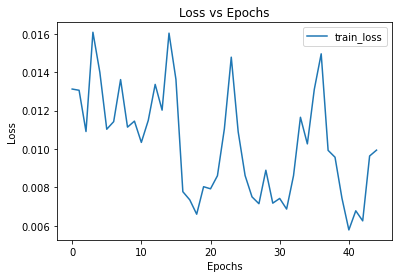

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_loss')
# plt.plot(val_losses, label='val_loss')
# plt.plot(test_losses, label='test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

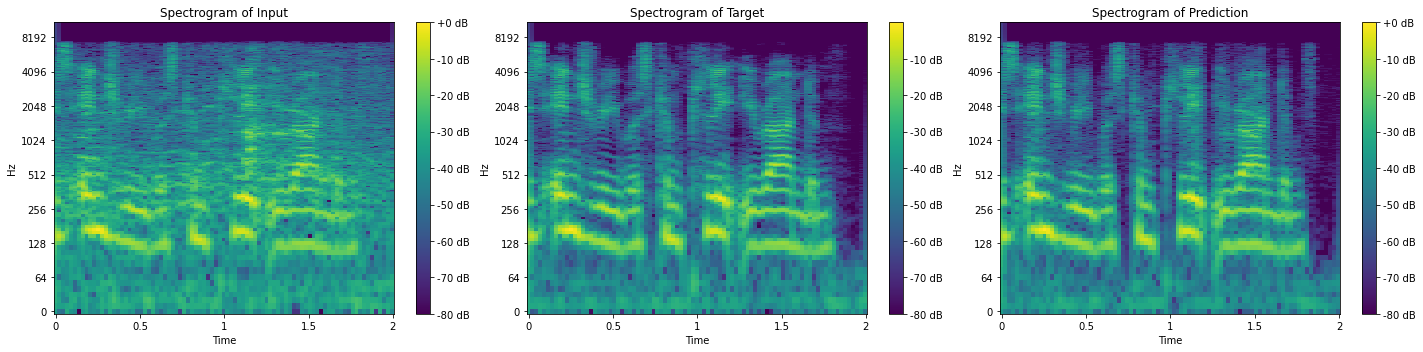

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 5))
for i, (f, title) in enumerate(zip(['audio_outputs/input_105941.wav', 'audio_outputs/target_105941.wav', 'audio_outputs/pred_105941.wav'],
                          ['Input', 'Target', 'Prediction'])):
    # Load audio file
    y, sr = librosa.load(f)

    # Compute spectrogram
    S = librosa.stft(y)  # Short-time Fourier transform
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)  # Convert to dB scale

    # Plot
    plt.subplot(1, 3, i + 1)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram of {title}")
    plt.tight_layout()
plt.show()

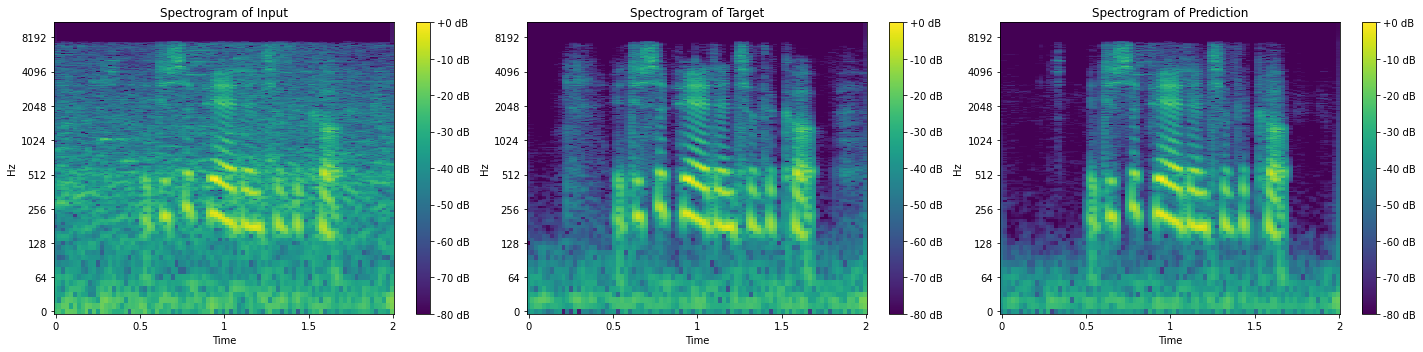

In [11]:
plt.figure(figsize=(20, 5))
for i, (f, title) in enumerate(zip(['audio_outputs/input_151557.wav', 'audio_outputs/target_151557.wav', 'audio_outputs/pred_151557.wav'],
                          ['Input', 'Target', 'Prediction'])):
    # Load audio file
    y, sr = librosa.load(f)

    # Compute spectrogram
    S = librosa.stft(y)  # Short-time Fourier transform
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)  # Convert to dB scale

    # Plot
    plt.subplot(1, 3, i + 1)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram of {title}")
    plt.tight_layout()
plt.show()